<!-- # <span style="color:#FFFFFF; font-size: 0%;">1 | Introduction</span>
<div style="border-radius: 0px; background-color: #112241; text-align:center;">
    <h4 style="color: white; padding: 1.5rem; font-size: 19px"><b>1 | INTRODUCTION</b></h4>
</div>
<!-- <br> -->

<div style="display: flex; flex-direction: row; align-items: center;">
    <div style="flex: 0; margin-top: 8px;">
        <img src="https://media.istockphoto.com/id/157619106/photo/banking.jpg?s=612x612&w=0&k=20&c=jPBeZ34Tf1OQk4dizkF63ItCn0sLxX66jYY_QztjjIU=" alt="Image" style="max-width: 300px; max-height: 350px;" />
    </div>
    <div style="flex: 1; margin-left: 30px; margin-top: 6px">
        <p style="font-weight: bold; color: black; font-size: 17px">Introduction</p>
        <p>Happy New Year to the everyone reading this notebooks. This notebook is created for Binary Classification with a Bank Churn Dataset in the Playground Season-4 Episode-1.
        </p>
        <p>This is a beginner-friendly notebook that attempts to perform Exploratory Data Analysis on the Bank Churn Dataset and eventually train a <b>XGBoost</b> model on it and enhance the predictions by fine-tuning the model.
        </p>
        <p>Let's explore and then make results and discussion to gain deeper insights from our analysis. Let's explore and then make results and discussion to gain deeper insights from our analysis.</p>
        <blockquote>  If find this notebook helpful please consider upvoting ❤️</blockquote>
    </div>
</div>


## Contents:
<hr>

1. [Data Exploration](#data)
2. [Exploritory Data Analysis](#eda)
3. [Modeling](#model)
4. [Hyperparameter Tuning and Cross Validation](#hyper)
5. [Visualizations](#graph)
6. [Submission](#submission)

### All the used libraries:

- Numpy
- Pandas
- Matplotlib
- Seaborn
- Scikit-learn
- XGBoost
- warnings

### Models used to make predictions:

- XGBoost Classifier
- GridSearchCV for Hyperparameter tuning

Now, let's import the data.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import shap

import warnings
warnings.filterwarnings("ignore")

In [2]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')


# 1. Data Exploration: <a name="data"></a>
- The dataset for this competition (both train and test) was generated from a deep learning model trained on the [Bank Customer Churn Prediction dataset](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction). Feature distributions are close to, but not exactly the same, as the original.

## 1.1 Data Description:

- **Customer ID:** A unique identifier for each customer
- **Surname:** The customer's surname or last name
- **Credit Score:** A numerical value representing the customer's credit score
- **Geography:** The country where the customer resides
- **Gender:** The customer's gender
- **Age:** The customer's age.
- **Tenure:** The number of years the customer has been with the bank
- **Balance:** The customer's account balance
- **NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)
- **HasCrCard:** Whether the customer has a credit card
- **IsActiveMember:** Whether the customer is an active member
- **EstimatedSalary:** The estimated salary of the customer
- **Exited:** Whether the customer has churned (Target Variable)

In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

origional_data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

## 1.2 Train Data

In [4]:
train_data.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [5]:
train_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,165034.000000,82516.500000,47641.356500,0.000000,41258.250000,82516.500000,123774.750000,165033.000000
CustomerId,165034.000000,15692005.019026,71397.816791,15565701.000000,15633141.000000,15690169.000000,15756824.000000,15815690.000000
CreditScore,165034.000000,656.454373,80.103340,350.000000,597.000000,659.000000,710.000000,850.000000
Age,165034.000000,38.125888,8.867205,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,165034.000000,5.020353,2.806159,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,165034.000000,55478.086689,62817.663278,0.000000,0.000000,0.000000,119939.517500,250898.090000
NumOfProducts,165034.000000,1.554455,0.547154,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,165034.000000,0.753954,0.430707,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,165034.000000,0.497770,0.499997,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,165034.000000,112574.822734,50292.865585,11.580000,74637.570000,117948.000000,155152.467500,199992.480000


## 1.3 Test Data

In [6]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [7]:
test_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,110023.000000,220045.000000,31761.048671,165034.000000,192539.500000,220045.000000,247550.500000,275056.000000
CustomerId,110023.000000,15692096.605101,71684.990992,15565701.000000,15632859.000000,15690175.000000,15756926.000000,15815690.000000
CreditScore,110023.000000,656.530789,80.315415,350.000000,597.000000,660.000000,710.000000,850.000000
Age,110023.000000,38.122205,8.861550,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,110023.000000,4.996637,2.806148,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,110023.000000,55333.611354,62788.519675,0.000000,0.000000,0.000000,120145.605000,250898.090000
NumOfProducts,110023.000000,1.553321,0.544714,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,110023.000000,0.753043,0.431244,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,110023.000000,0.495233,0.499980,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,110023.000000,112315.147765,50277.048244,11.580000,74440.325000,117832.230000,154631.350000,199992.480000


## 1.4 Origional Data

In [8]:
origional_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
origional_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


# 2. Exploritory Data Analysis <a name="eda"></a>
- Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected. EDA is an important first step in any data analysis.

## 2.1 Null Values:

Missing data/Null values is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.Here is a list of popular strategies to handle missing values in a dataset
- Deleting the Missing Values
- Imputing the Missing Values
- Imputing the Missing Values for Categorical Features
- Imputing the Missing Values using Sci-kit Learn Library
- Using “Missingness” as a Feature

Let's see if our data has any missing values or not.


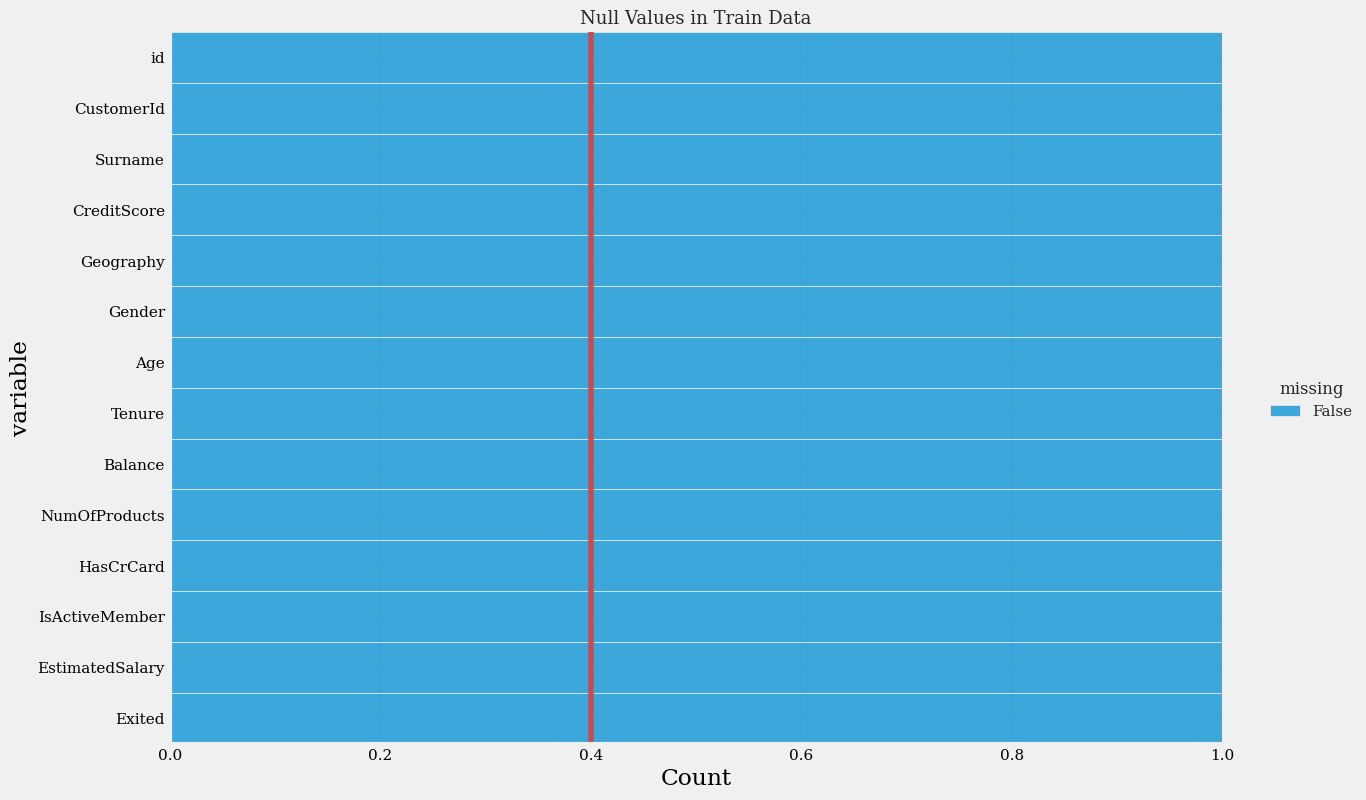

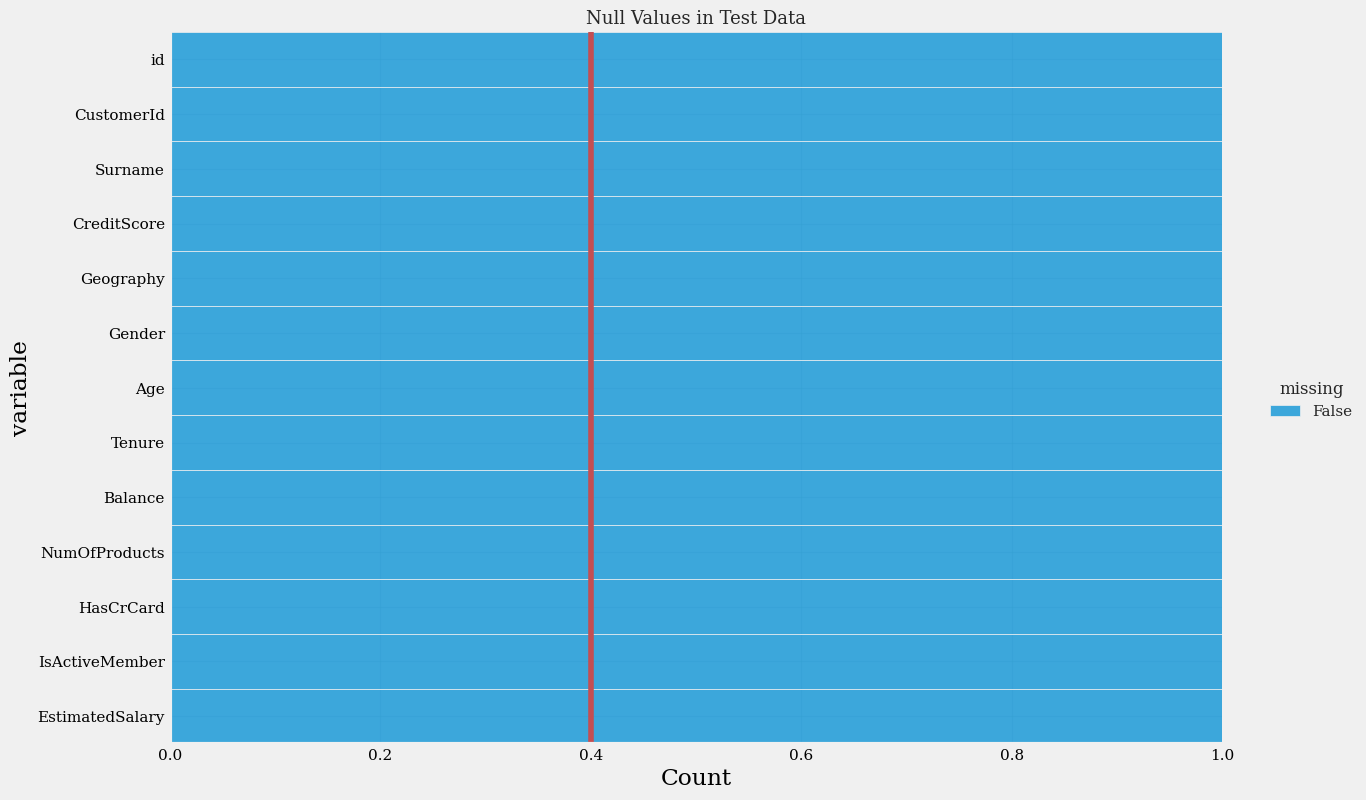

In [10]:
sns.displot(data=train_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
plt.axvline(0.4, color='r')
plt.title('Null Values in Train Data', fontsize=13)
plt.show()

# -------------------------

sns.displot(data=test_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
plt.axvline(0.4, color='r')
plt.title('Null Values in Test Data', fontsize=13)
plt.show()

As we can see we have no null values in the both `train` and `test` data.

## 2.2 Target Variable Analysis

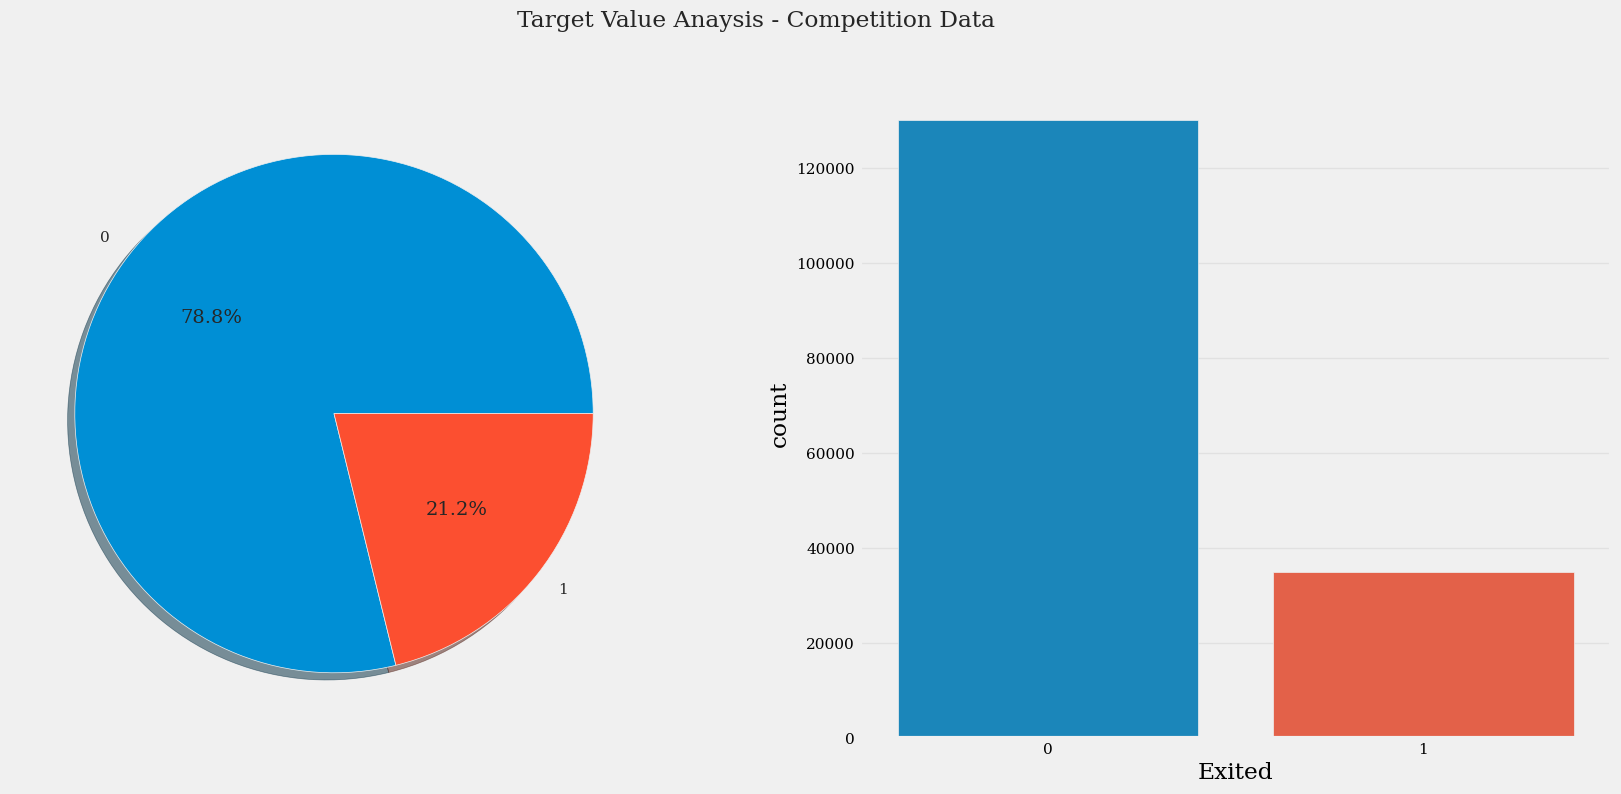

In [11]:
f,ax=plt.subplots(1,2,figsize=(19,8))
train_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=train_data,ax=ax[1])
# ax[1].set_title('Count-Plot')
plt.suptitle('Target Value Anaysis - Competition Data')
plt.show()

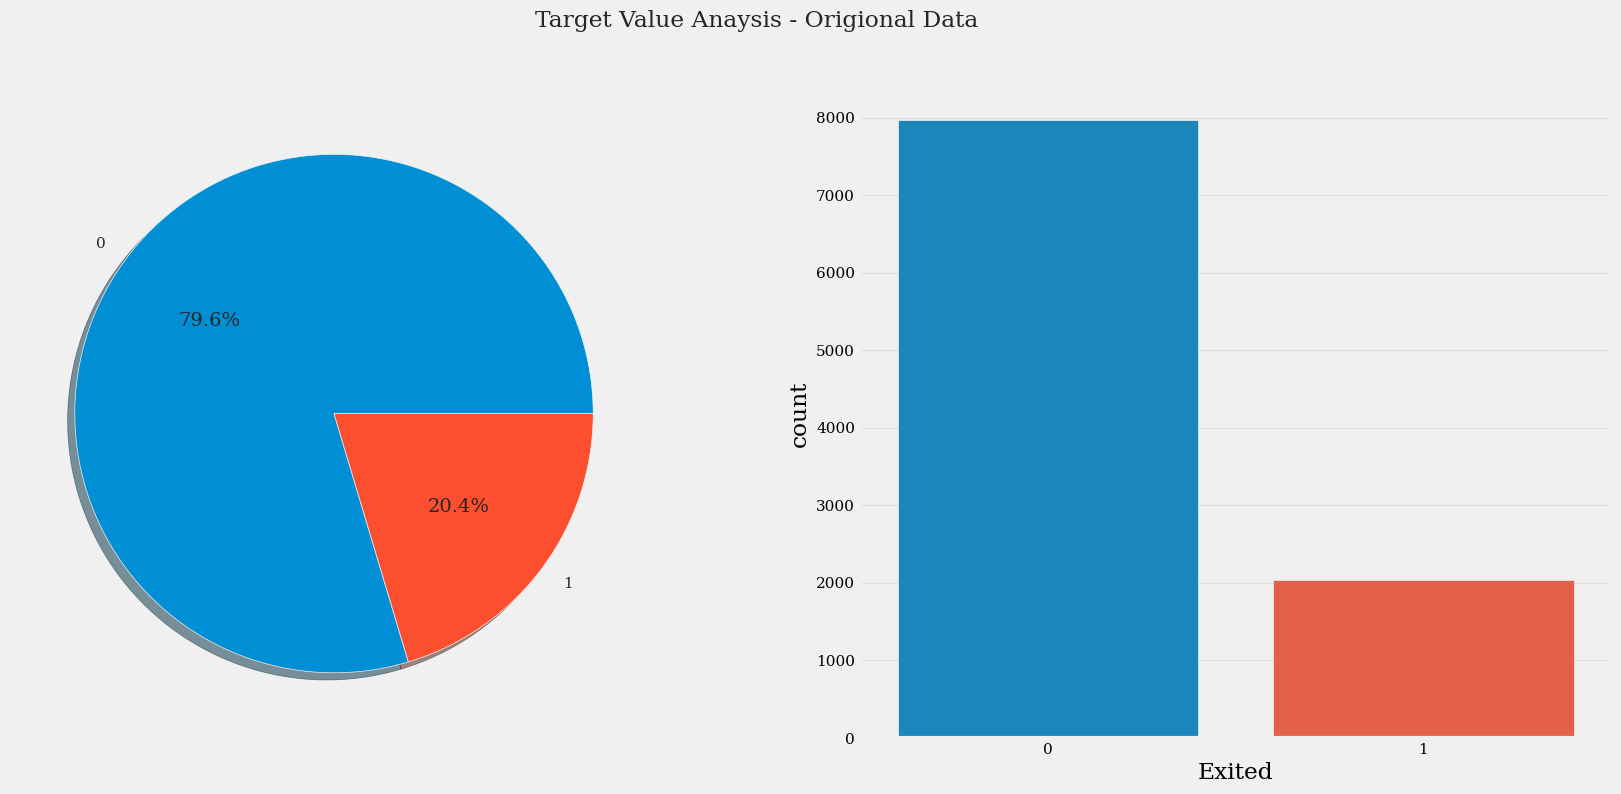

In [12]:
f,ax=plt.subplots(1,2,figsize=(19,8))
origional_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=origional_data,ax=ax[1])
# ax[1].set_title('Count-Plot')
plt.suptitle('Target Value Anaysis - Origional Data')
plt.show()

### Some Observations from above plots:

- Distribution of both classes `Exited` and `Not Exited` is almost same in both of the Origional and Competition Datasets.
- Also we can see that data is highly imbalanced. Almost **80%** of our data is from class 0 (not exited) and **20%** data is from class 1 (exited).
- In a real life also we only care about the persons or the people who are quitting or leaving `(Exited)` the bank and we only want to analyse the patterns of those people. 

In [13]:
# Unique value counts for each column
unique_counts = train_data.nunique()

# Threshold to distinguish continuous and categorical
threshold = 12

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

# Removing the 'outcome' from categorical since it's our target variable
if 'outcome' in categorical_vars:
    categorical_vars.remove('outcome')
if 'id' in continuous_vars:
    continuous_vars.remove('id')

# print(f"Categorical Variables: {categorical_vars}")
# print(f"Continousl/Numerical Variables: {continuous_vars}")

## 2.3 Categorical Variables Analysis:    
In statistics, a categorical variable (also called qualitative variable) is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property. Categorical data is the statistical data type consisting of categorical variables or of data that has been converted into that form.

In our data categorical varibles are:

- Geography 
- Gender
- Tenure
- NumOfProducts
- HasCrCard
- IsActiveMember

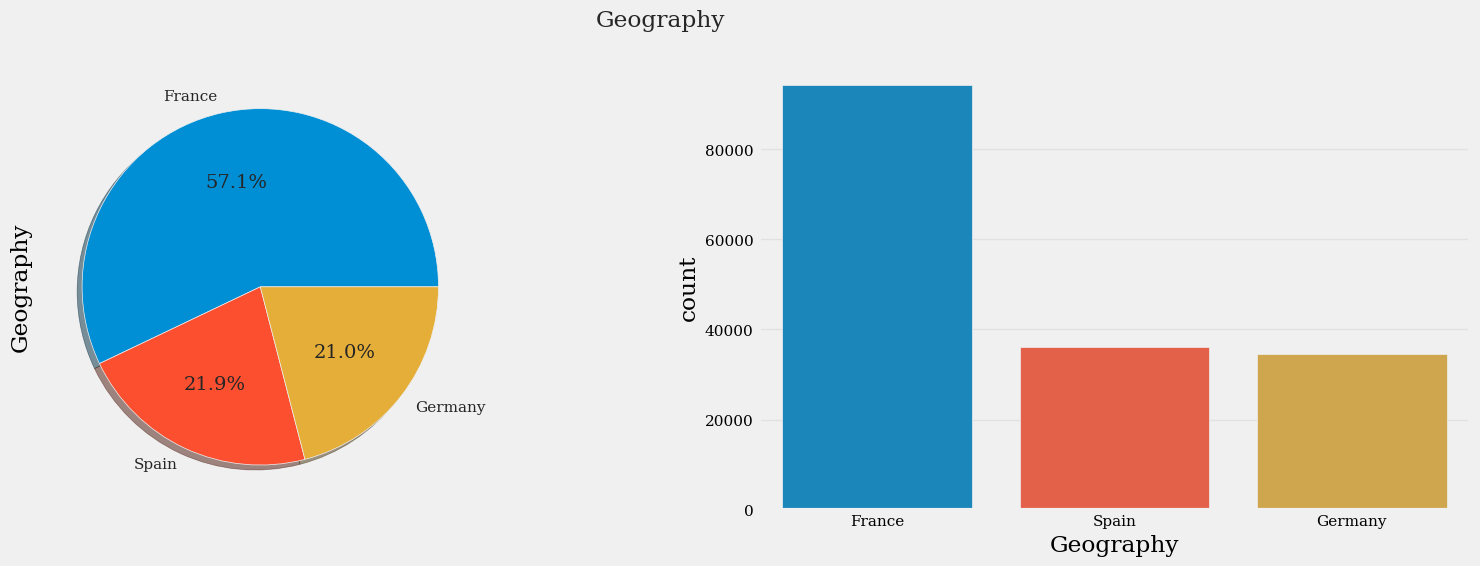

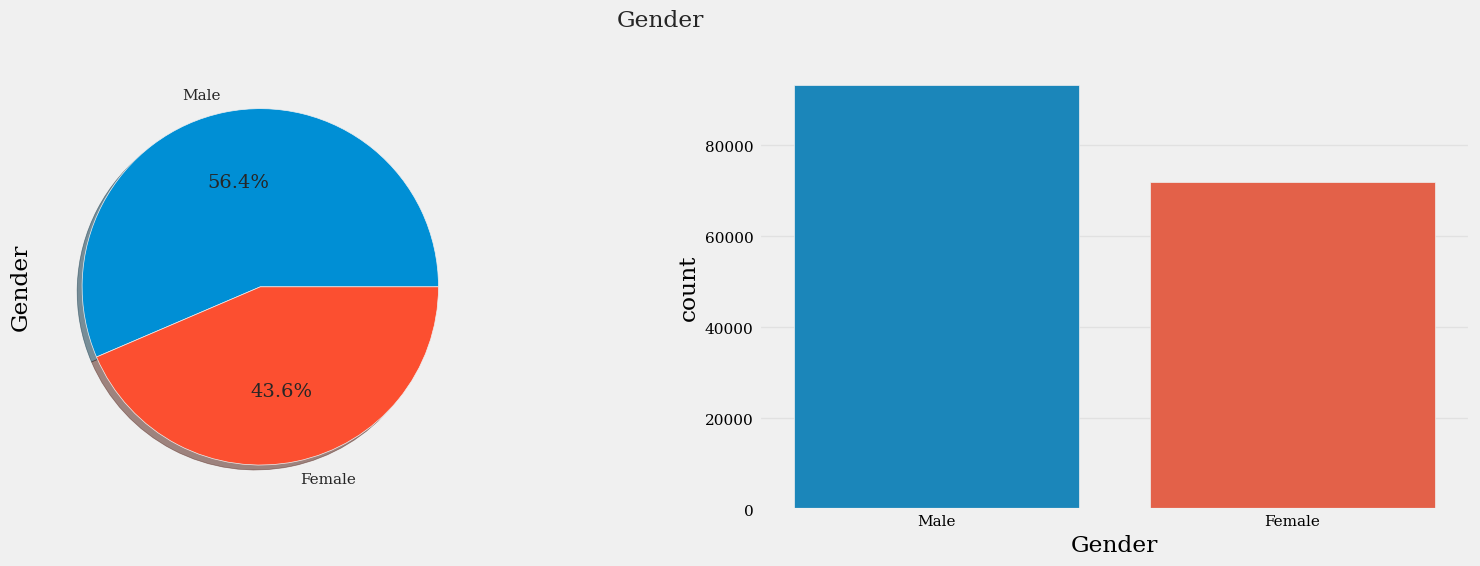

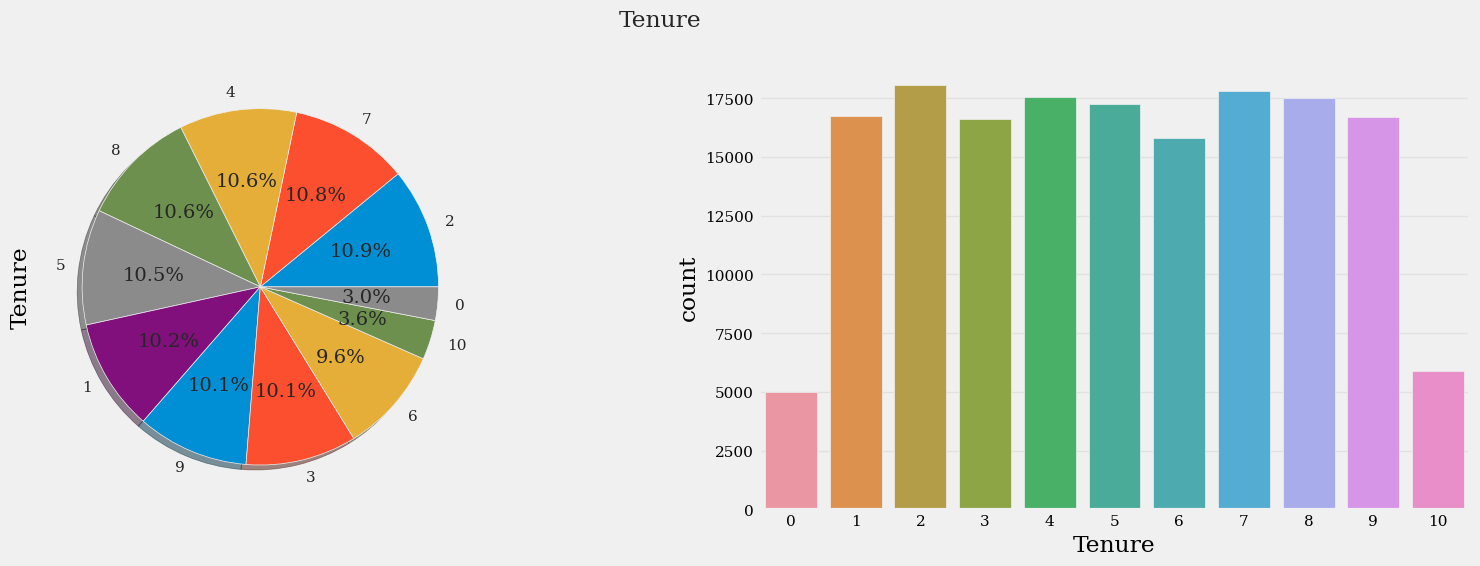

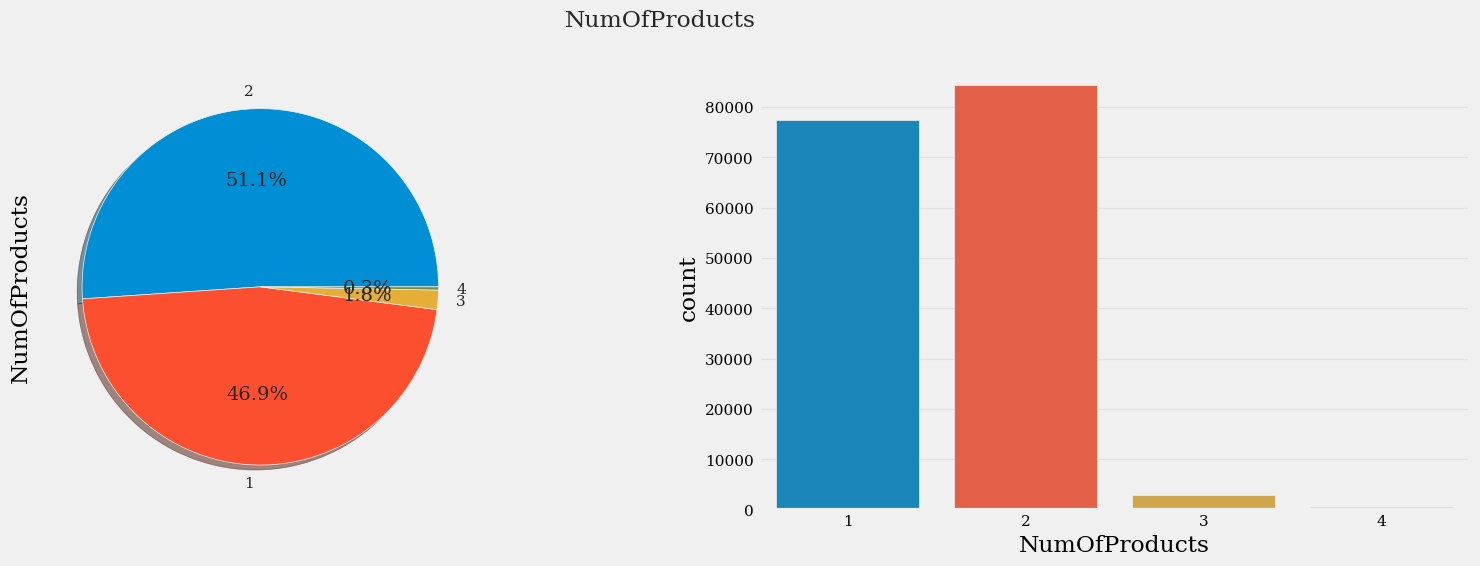

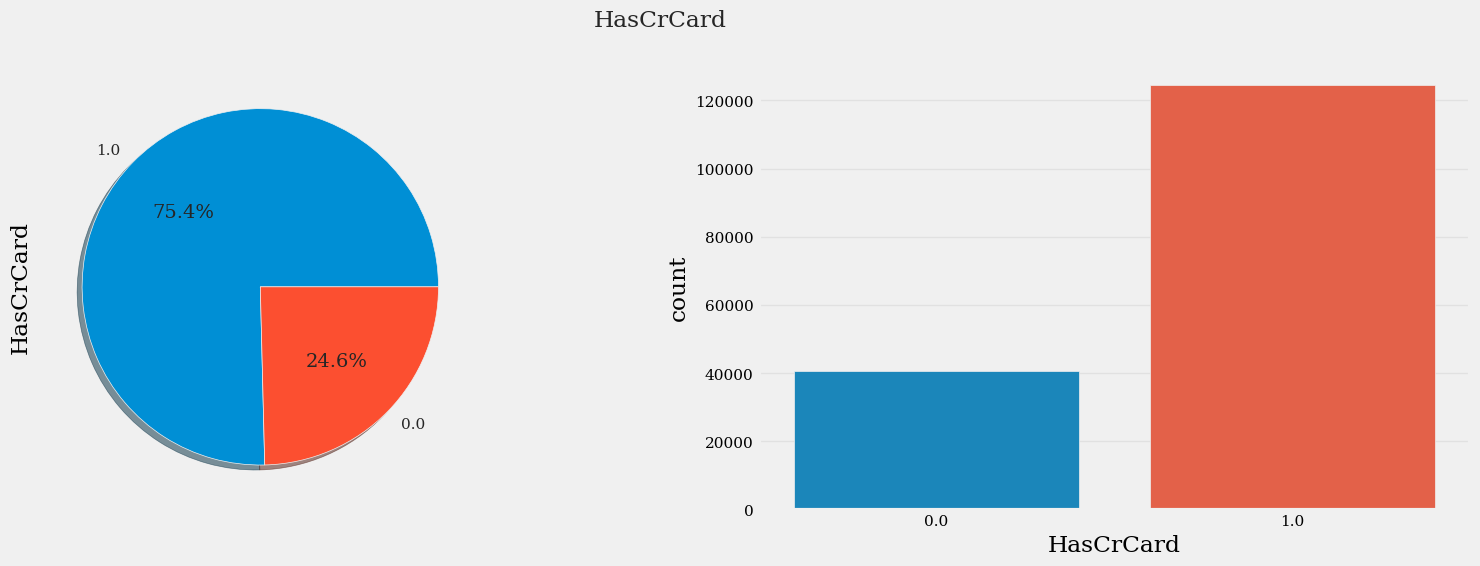

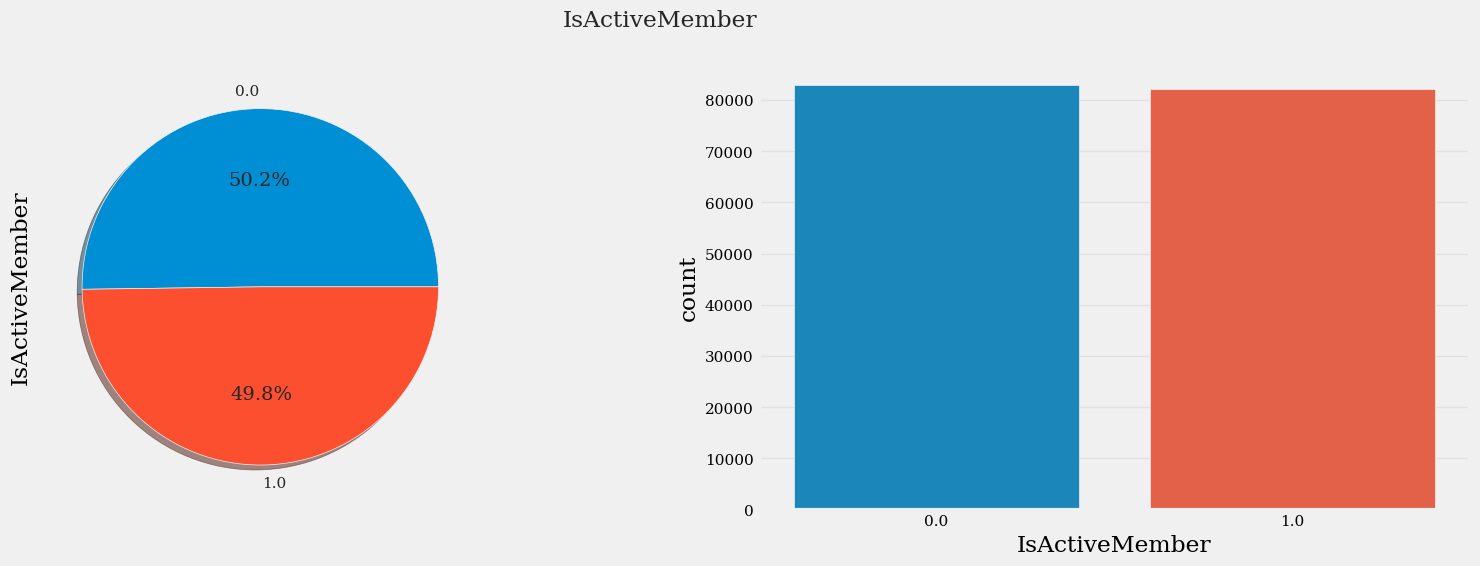

In [14]:
categorical_vars.remove('Exited')

for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    train_data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=train_data,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

### Some Observations from above plots:

- Some of the variables like `IsActiveMember`, `Tenure` and `Gender` are almost equaly distributed while the other variables like `HasCrCard`, `NumOfProducts`, and `Gender` are not equaly distributed.
- At first `Tenure` seems like continuous variable but it is a categorical variable with 11 classes from 0 to 10.


## 2.4 Numerical Value Analysis:
In Mathematics, if a variable can take on two or more distinct real values so that it can also take all real values between them (even values that are randomly close together). In this case, the variable is continuous in the given interval. Continuous data is the statistical data type consisting of continuous variables or of data that has been converted into that form.

In our data Continuous variables are:

- CreditScore
- Age
- Balance
- EstimatedSalary

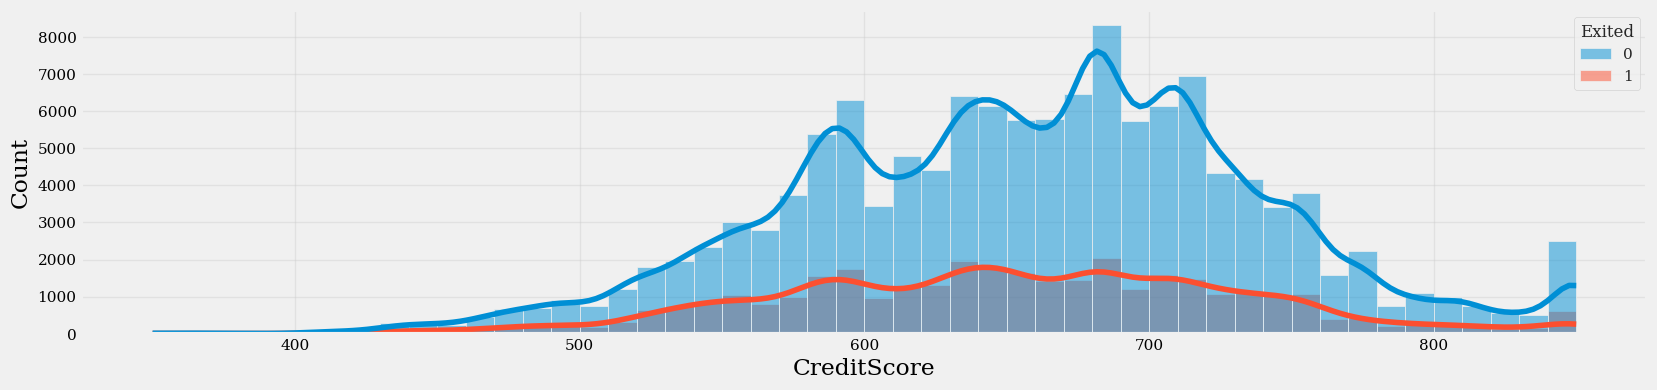

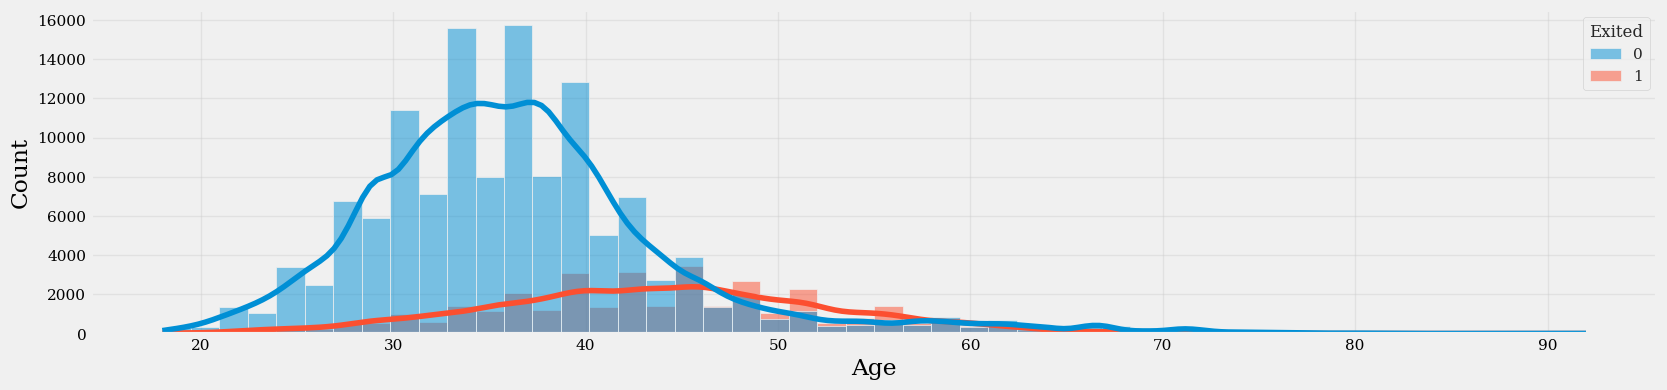

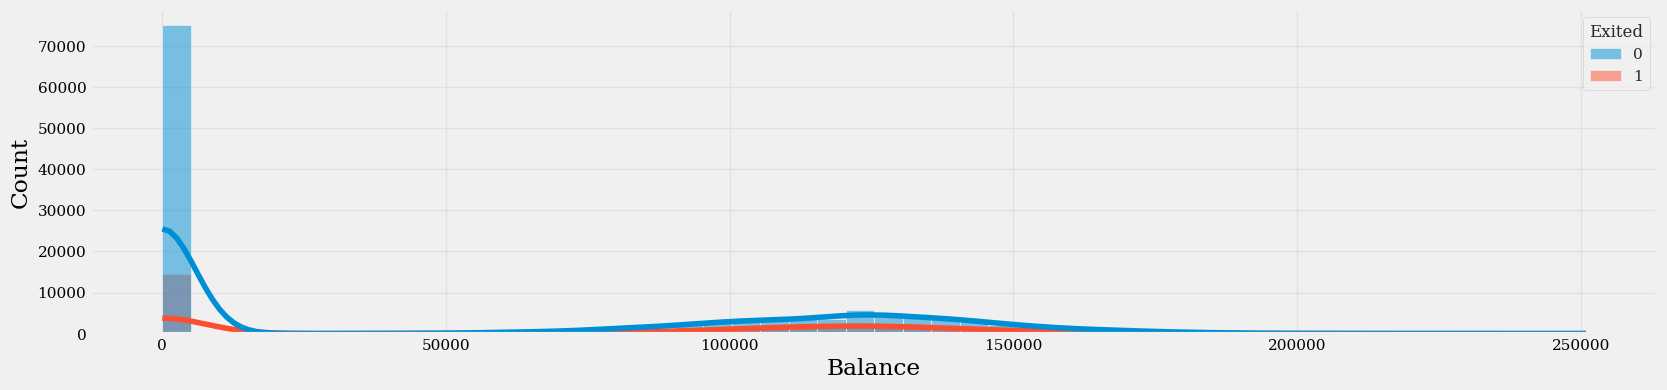

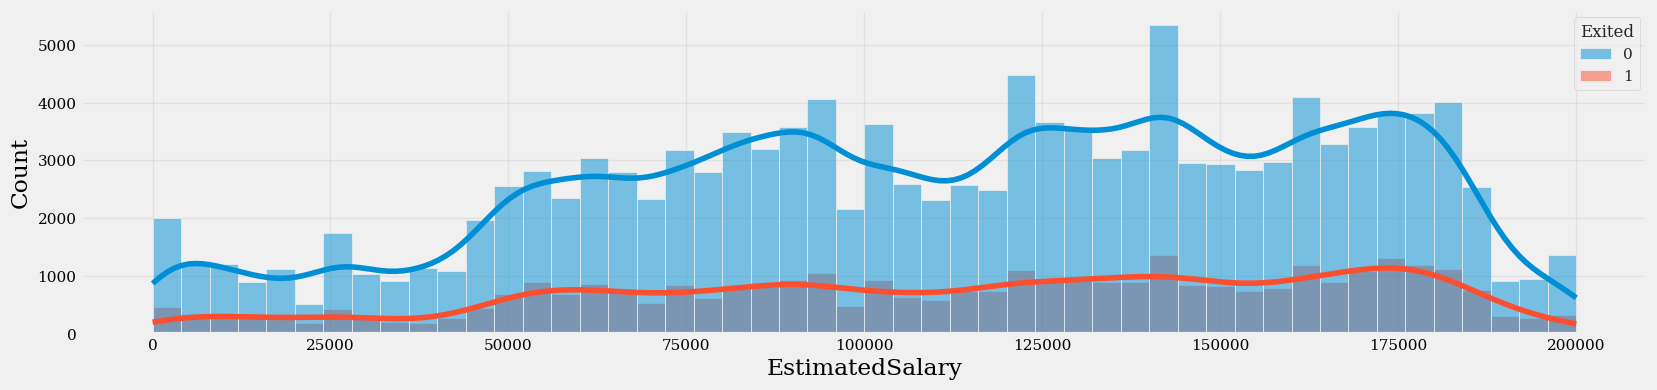

In [15]:
continuous_vars.remove('CustomerId')
continuous_vars.remove('Surname')

for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=train_data, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

### Some Observations from above plots:

- Majority of the data from `balance` variable is 0 only which makes the distribution skewed to 0 side.
- Other variables also show the skewness in the distributions.
- Distribution of data for both classes is almost same for all the variables.

## 2.5 Multivariate Analysis:
Multivariate analysis is based in observation and analysis of more than one statistical outcome variable at a time.

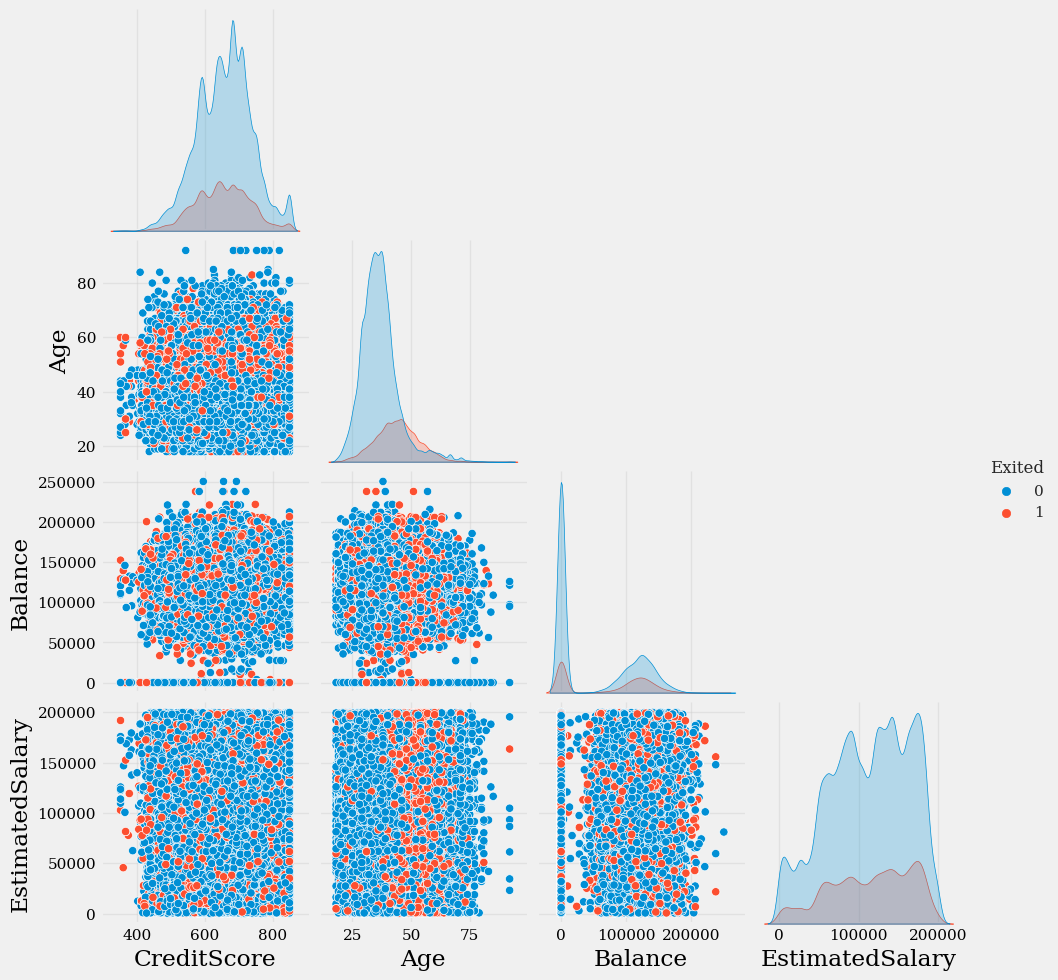

In [16]:
df3 = train_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].copy()
sns.pairplot(df3, hue="Exited", corner=True)
plt.show()

## 2.6 Correlation Analysis:

Correlation is the statistical analysis of the relationship or dependency between two variables. Correlation allows us to study both the strength and direction of the relationship between two sets of variables.

There are mainly 3 types of Correlations:

- Positive Correlation: Two variables are said to be positively correlated when their values move in the same direction.
- Neutral Correlation: No relationship in the change of variables X and Y. In this case, the values are completely random and do not show any sign of correlation.
- Negative Correlation: Finally, variables X and Y will be negatively correlated when their values change in opposite directions.

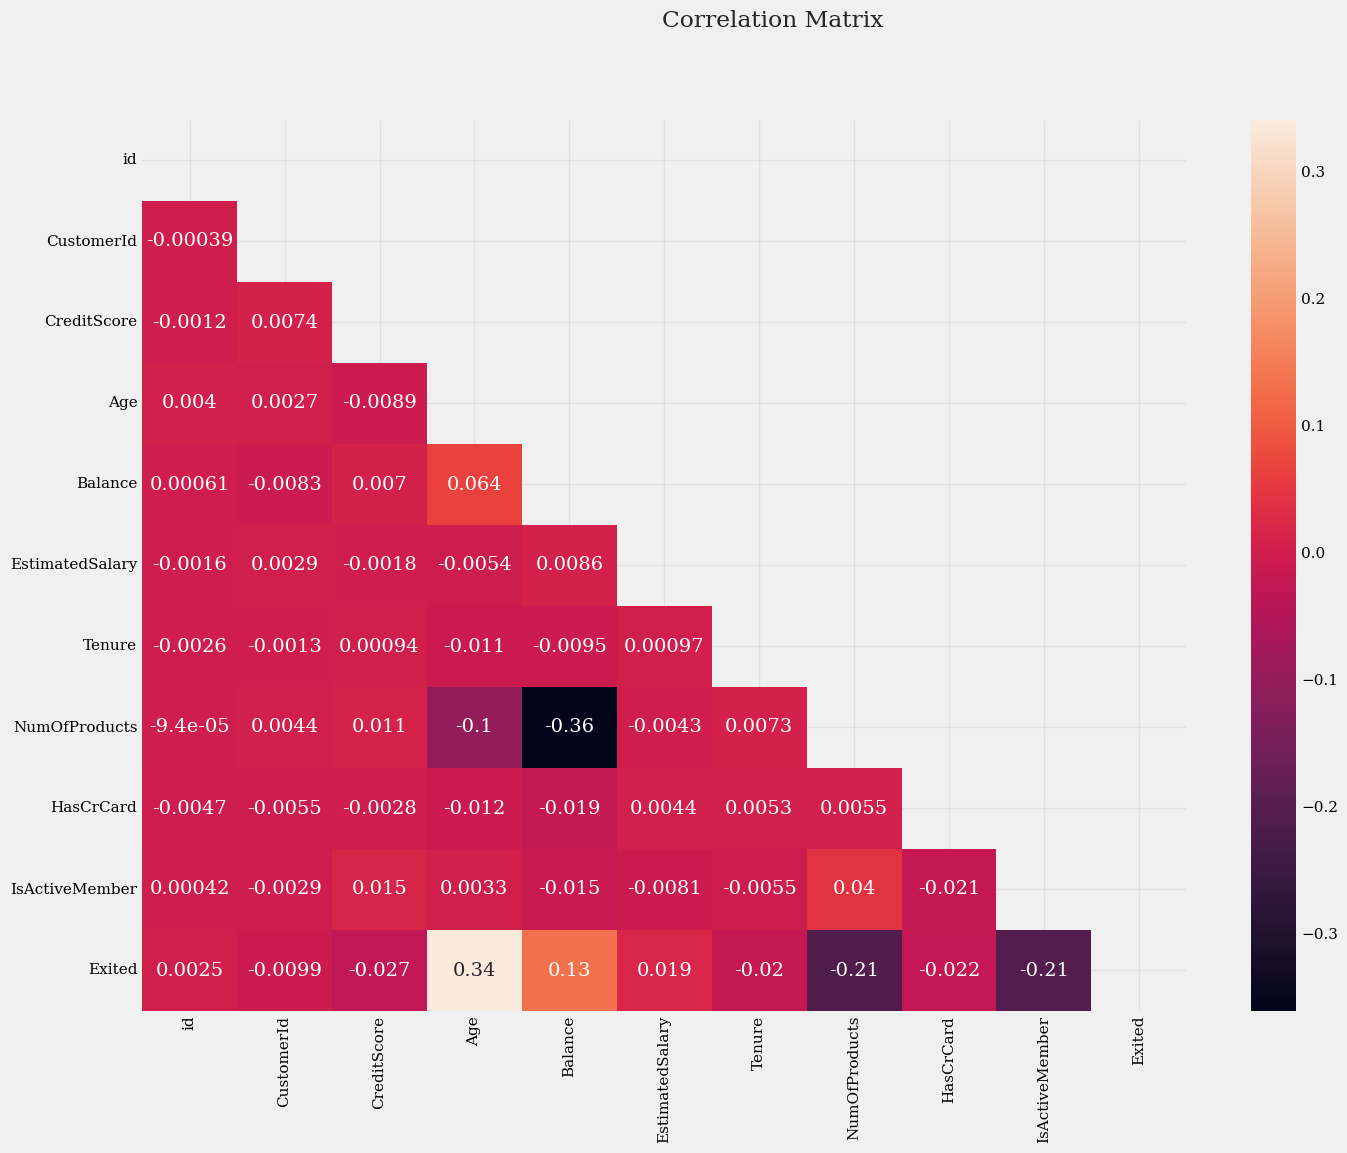

In [17]:
df4 = train_data[['id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

# 3. Modelling <a name="model"></a>

I will be using XGBoost model for this data.

<div style="display: flex; flex-direction: row; align-items: center;">
    <div style="flex: 0; margin-top: 8px;">
        <img src="https://deepandshallowml.files.wordpress.com/2020/02/5148544.jpg?w=400" alt="Image" style="max-width: 300px;" />
    </div>
    <div style="flex: 1; margin-left: 30px; margin-top: 6px">
        <p style="font-weight: bold; color: black; font-size: 17px">XGBoost:</p>
        <p><b>eXtreme Gradient Boosting (XGBoost)</b> is a scalable and improved version of the gradient boosting algorithm (terminology alert) designed for efficacy, computational speed and model performance.</p>
        <p>XGBoost is one of the most popular machine learning frameworks among data scientists. According to the <b>Kaggle State of Data Science Survey 2021</b>, almost 50% of respondents said they used XGBoost, ranking below only TensorFlow and Sklearn.</p>
        <p>XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.</p>
    </div>
</div>
    
    
## 3.1 What is XGBoost?

To understand XGBoost first we need to understand Decision Trees and Gradient Boosting Methods.

### Decision Trees:
- A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 
- Decision trees are one of the most easily interpretable models, they exhibit highly variable behavior.

### Boosting:
- In boosting, these trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

### Gradient Boosting:
- The gradient boosting ensemble technique consists of three simple steps:

1. An initial model F0 is defined to predict the target variable y. This model will be associated with a residual (y – F0)

2. A new model h1 is fit to the residuals from the previous step.

3. Now, F0 and h1 are combined to give F1, the boosted version of F0. The mean squared error from F1 will be lower than that from F0:

> $ F_1 = F_0 + H_1  $

- To improve the performance of F1, we could model after the residuals of F1 and create a new model F2:

> $ F_2 = F_1 + H_2  $

- This can be done for ‘m’ iterations, until residuals have been minimized as much as possible:

> $ F_m = F_{m-1} + H_m  $

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation.

### eXtreme Gradient Boosting (XGBoost):
- Gradient Boosting and XGBoost are related concepts, but XGBoost (Extreme Gradient Boosting) is a specific implementation of the gradient boosting framework that enhances its performance and efficiency.
- Some of the advantages of using XGBoost over Gradient Boosting are:

**1. Regularization:**

- XGBoost Incorporates both L1 (LASSO) and L2 (Ridge) regularization terms in the objective function, providing better control over model complexity.

**2. Parallelization:**
- XGBoost is optimized for parallel computing, making it more efficient and scalable. This is achieved through parallel tree construction, which is particularly beneficial for large datasets.

**3. Handling Missing Values:**
- XGBoost can handle missing values internally, reducing the need for explicit imputation.

**4. Tree Pruning:**
- XGBoost utilizes "max_depth" and "min_child_weight" parameters during tree construction to control the depth and size of trees, enabling more effective pruning.

**5. Cross-validation:**
- XGBoost has built-in cross-validation capabilities, simplifying the model selection process while cross-validation in gradient boosting needs to be implemented separately.

<hr>

## 3.2 Data Preparation:

Now, let's prepare our data for the modeling part.

> **I have removed `id`, `CustomerId`, and `Surname` as they do not provide any valuable information about the classes.**

In [18]:
X = train_data.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = train_data['Exited']

In [19]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

## 3.3 Encoding Caegorical Variables:

There are multiple encoders available but 2 of them are very famous.

**1. Label Encoder:**
- Label Encoding is a popular encoding technique for handling categorical variables. A unique integer or alphabetical ordering represents each label.
- Problems with Label Encoder: Although if our Categorical Data has no order in it the `LabelEncoder` will assign the integer according to the alphabetical ordering and because of that.

**2. One Hot Encoder:**
- One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables.

- In the case of XGBoost OneHotEncoder works better than the other encoders so I will use that.

In [21]:
X_encoded = pd.get_dummies(X, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])

X_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0.0,IsActiveMember_1.0,HasCrCard_0.0,HasCrCard_1.0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,668,33.0,3,0.00,181449.97,True,False,False,False,True,True,False,False,True,False,True,False,False
1,627,33.0,1,0.00,49503.50,True,False,False,False,True,False,True,False,True,False,True,False,False
2,678,40.0,10,0.00,184866.69,True,False,False,False,True,True,False,False,True,False,True,False,False
3,581,34.0,2,148882.54,84560.88,True,False,False,False,True,False,True,False,True,True,False,False,False
4,716,33.0,5,0.00,15068.83,False,False,True,False,True,False,True,False,True,False,True,False,False


In [22]:
# test_data.head()

test_data = test_data.drop(['id', 'CustomerId', 'Surname'], axis=1)
test_data.head()

X_test_encoded = pd.get_dummies(test_data, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])

X_test_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0.0,IsActiveMember_1.0,HasCrCard_0.0,HasCrCard_1.0,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,586,23.0,2,0.00,160976.75,True,False,False,True,False,False,True,True,False,False,True,False,False
1,683,46.0,2,0.00,72549.27,True,False,False,True,False,True,False,False,True,True,False,False,False
2,656,34.0,7,0.00,138882.09,True,False,False,True,False,True,False,False,True,False,True,False,False
3,681,36.0,8,0.00,113931.57,True,False,False,False,True,True,False,False,True,True,False,False,False
4,752,38.0,10,121263.62,139431.00,False,True,False,False,True,True,False,False,True,True,False,False,False


## 3.4 Splitting Data

- As we discussed earlier both of the classes in our data are highly imbalanced. Almost **80%** of our data is from class 0 (not exited) and **20%** data is from class 1 (exited). Which also can be analyzed by dividing `sum(y)` with` len(y)`.



In [23]:
sum(y)/len(y)

0.21159882206090866

To maintain the equal proportion of the both classes we use `stratify`. stratify parameter will preserve the proportion of target as in original dataset, in the train and test datasets as well. 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y)

In [25]:
sum(y_train)/len(y_train)

0.21160169662694406

In [26]:
sum(y_test)/len(y_test)

0.211590198502145

As we can see we have both `train` and `test` data in equal proportion.

## 3.5 Creating Baseline Model:

- Now that we have splitted the data into `train` and `test` set sucessfully. Let's create a baseline model for our data. We will try to improve the model by **Hyperparameter Tuning** and **Cross-Validation**.
- The Basic understanding of the parameteres that I have used here in model is given below:

**1. Objective:**

The two most popular classification objectives are:

- **`binary:logistic`** - binary classification (the target contains only two classes, i.e., cat or dog)
- **`multi:softprob`** - multi-class classification (more than two classes in the target, i.e., apple/orange/banana)

Our data has only 2 classes `Exited=1` and `Exited=0` so I am using `binary:logistic` as objective here.

**2. Verobse:** To know what is going on in the model train we set `verbose` as `True`. 

**3. Early Stopping Round:** 
- When given an unnecessary number of boosting rounds, XGBoost starts to overfit and memorize the dataset. This, in turn, leads to validation performance drop because the model is memorizing instead of generalizing. `early_stopping_rounds` helps to prevent that.
- If value of `early_stopping_rounds` is set to 10 then model will stop the training process if there is no major improvement in the evaluation parameters.

**4. Evaluation Metric:** The performance measure. For example, `r2` for regression models, `precision` for classification models. I will be using `auc` (Area under curve) because it performs well with the imbalanced data.

**5. Evaluation set:** `X_test` and `y_test` both are used for the evaluation purpose.

In [27]:
clf_xgb_v1 = xgb.XGBClassifier(objective='binary:logistic',
                            # missing=None,
                            seed=42)

clf_xgb_v1.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.69472
[1]	validation_0-aucpr:0.70619
[2]	validation_0-aucpr:0.71192
[3]	validation_0-aucpr:0.71619
[4]	validation_0-aucpr:0.71861
[5]	validation_0-aucpr:0.71974
[6]	validation_0-aucpr:0.72083
[7]	validation_0-aucpr:0.72283
[8]	validation_0-aucpr:0.72409
[9]	validation_0-aucpr:0.72387
[10]	validation_0-aucpr:0.72460
[11]	validation_0-aucpr:0.72498
[12]	validation_0-aucpr:0.72483
[13]	validation_0-aucpr:0.72510
[14]	validation_0-aucpr:0.72504
[15]	validation_0-aucpr:0.72514
[16]	validation_0-aucpr:0.72559
[17]	validation_0-aucpr:0.72564
[18]	validation_0-aucpr:0.72555
[19]	validation_0-aucpr:0.72561
[20]	validation_0-aucpr:0.72577
[21]	validation_0-aucpr:0.72630
[22]	validation_0-aucpr:0.72603
[23]	validation_0-aucpr:0.72614
[24]	validation_0-aucpr:0.72615
[25]	validation_0-aucpr:0.72602
[26]	validation_0-aucpr:0.72600
[27]	validation_0-aucpr:0.72591
[28]	validation_0-aucpr:0.72601
[29]	validation_0-aucpr:0.72638
[30]	validation_0-aucpr:0.72639
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

As we can see that validation score is improving for each iteration and model stopped training after 54th run it means that in the last 10 runs 44-54 there was no major increase in `auc` score.

## 3.6 Evaluation
- Now let's evaluate the model on the `X_test` and `y_test` data. I will be creating **Confusion Matrix** to know the performance of the model on both of the classes. 

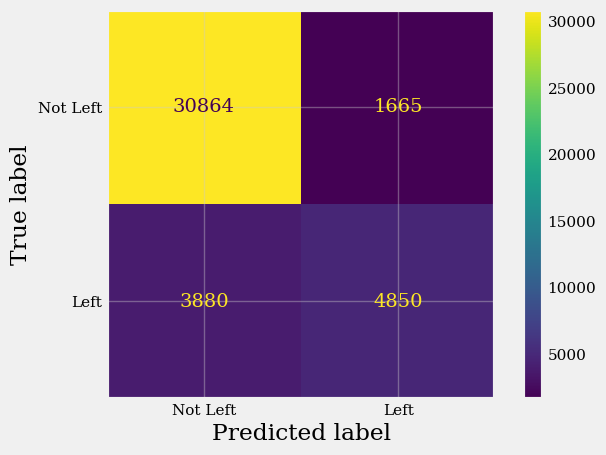

In [28]:
predictions_1 = clf_xgb_v1.predict(X_test)

# sns.set(font_scale=1)
cm = confusion_matrix(y_test, predictions_1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Left', 'Left'])
disp.plot()
plt.show()

### Some Observations from above plot:

- from confusion matrix we can see that total of the **32533** people that **did not leave**, **30864 (94%)** were correctly classified and from the total people that left the conpany, **8730** only **4850 (55%)** were correctly classified.

- So we can see that our model is performing very good on `exited=0` and it is performing **very poorly** on the other class `exited=1`.

- People who are leaving the bank will cost more to the bank so if our model successfully captures more of those people we can say that our model is performing well.

In XGBoost Hyperparameter `scale_pos_weight` helps to deal with the imbalanced data.

# 4. Hyperparameter Tuning and Cross-Validation: <a name="hyper"></a>

Hyperparameters for XGBoost are very complex and I suggest to go through [A Guide on XGBoost hyperparameters tuning](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning) it covers all the Hyperparameters related to XGBoost. Basic understanding of Hyperparameters that are used here is given below:

**1. max_depth:** The maximum depth of a tree.

**2. learning_rate:** Same as the learning rate in CNNs.

**3. gamma:** A node is split only when the resulting split gives a positive reduction in the loss function.

**4. reg_lambda:** L2 regularization term on weights (analogous to Ridge regression).

**5. scale_pos_weight:** It controls the balance of positive and negative weights, It is useful for imbalanced classes. A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.

## 4.1 GridSearchCV:

- `GridSearchCV` and `RandomSearchCV` are 2 popular methods to find the optimal hyperparametes in the models.
- Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

Primarily, it takes 4 arguments i.e. estimator, param_grid, cv, and scoring. The description of the arguments is as follows:

1. **estimator**: A scikit-learn model
2. **param_grid**: A dictionary with parameter names as keys and lists of parameter values.
3. **scoring**: The performance measure. For example, ‘r2’ for regression models, ‘precision’ for classification models. Here we are using `auc` as out scoring metric.
4. **cv**: An integer that is the number of folds for K-fold cross-validation.

## 4.2 Cross-Validation: 

- Cross-validation is a technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data.
- We can also say that it is a technique to check how a statistical model generalizes to an independent dataset.

Also here,

- **subsample:**
Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.

- **colsample_bytree:** 
This is a family of parameters for subsampling of columns. All colsample_by* parameters have a range of (0, 1], the default value of 1, and specify the fraction of columns to be subsampled.

These both parameter will help to fit the model fastly.

For our model I have selected 3 values for each hyperparameter. Hyperparameter tuning is done in the total of 2 rounds. 


In [29]:
# # Round 1

# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.05, 0.01, 0.1],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5]
# }

# optimal_parameters = GridSearchCV(
#     estimator=xgb.XGBClassifier(objective='binary:logistic',
#                                 seed=42,
#                                 subsample=0.9,
#                                 colsample_bytree=0.5),
#     param_grid=param_grid,
#     scoring='roc_auc',
#     verbose=3,
#     n_jobs=10,
#     cv=3
# )

# optimal_parameters.fit(X_train,
#                        y_train,
#                        early_stopping_rounds=10,
#                        eval_metric='auc',
#                        eval_set=[(X_test, y_test)],
#                        verbose=True)

# print(optimal_parameters)

The Tuning process is very time-consuming and that's why I have comment-out that part but running the above code we will get the following output. 

```
[0]	validation_0-auc:0.80329
[1]	validation_0-auc:0.81212
[2]	validation_0-auc:0.85940
[3]	validation_0-auc:0.86696
[4]	validation_0-auc:0.86731
[5]	validation_0-auc:0.87412
[6]	validation_0-auc:0.87569
[7]	validation_0-auc:0.87483
[8]	validation_0-auc:0.87725
[9]	validation_0-auc:0.87728
[10]	validation_0-auc:0.87717
[11]	validation_0-auc:0.87879
[12]	validation_0-auc:0.88136
[13]	validation_0-auc:0.88187
[14]	validation_0-auc:0.88229
[15]	validation_0-auc:0.88306
[16]	validation_0-auc:0.88383
[17]	validation_0-auc:0.88450
[18]	validation_0-auc:0.88501
[19]	validation_0-auc:0.88504
[20]	validation_0-auc:0.88511
[21]	validation_0-auc:0.88524
[22]	validation_0-auc:0.88545
[23]	validation_0-auc:0.88559
[24]	validation_0-auc:0.88548
[25]	validation_0-auc:0.88565
[26]	validation_0-auc:0.88572
[27]	validation_0-auc:0.88568
[28]	validation_0-auc:0.88577
[29]	validation_0-auc:0.88611
[30]	validation_0-auc:0.88620
[31]	validation_0-auc:0.88615
[32]	validation_0-auc:0.88618
[33]	validation_0-auc:0.88616
[34]	validation_0-auc:0.88633
[35]	validation_0-auc:0.88683
[36]	validation_0-auc:0.88722
[37]	validation_0-auc:0.88732
[38]	validation_0-auc:0.88739
[39]	validation_0-auc:0.88736
[40]	validation_0-auc:0.88751
[41]	validation_0-auc:0.88779
[42]	validation_0-auc:0.88796
[43]	validation_0-auc:0.88797
[44]	validation_0-auc:0.88797
[45]	validation_0-auc:0.88803
[46]	validation_0-auc:0.88803
[47]	validation_0-auc:0.88803
[48]	validation_0-auc:0.88816
[49]	validation_0-auc:0.88824
[50]	validation_0-auc:0.88826
[51]	validation_0-auc:0.88826
[52]	validation_0-auc:0.88831
[53]	validation_0-auc:0.88836
[54]	validation_0-auc:0.88840
[55]	validation_0-auc:0.88845
[56]	validation_0-auc:0.88861
[57]	validation_0-auc:0.88866
[58]	validation_0-auc:0.88865
[59]	validation_0-auc:0.88864
[60]	validation_0-auc:0.88868
[61]	validation_0-auc:0.88869
[62]	validation_0-auc:0.88873
[63]	validation_0-auc:0.88881
[64]	validation_0-auc:0.88881
[65]	validation_0-auc:0.88880
[66]	validation_0-auc:0.88884
[67]	validation_0-auc:0.88899
[68]	validation_0-auc:0.88904
[69]	validation_0-auc:0.88905
[70]	validation_0-auc:0.88907
[71]	validation_0-auc:0.88909
[72]	validation_0-auc:0.88918
[73]	validation_0-auc:0.88917
[74]	validation_0-auc:0.88916
[75]	validation_0-auc:0.88918
[76]	validation_0-auc:0.88922
[77]	validation_0-auc:0.88923
[78]	validation_0-auc:0.88925
[79]	validation_0-auc:0.88928
[80]	validation_0-auc:0.88928
[81]	validation_0-auc:0.88937
[82]	validation_0-auc:0.88939
[83]	validation_0-auc:0.88939
[84]	validation_0-auc:0.88943
[85]	validation_0-auc:0.88944
[86]	validation_0-auc:0.88945
[87]	validation_0-auc:0.88950
[88]	validation_0-auc:0.88956
[89]	validation_0-auc:0.88957
[90]	validation_0-auc:0.88958
[91]	validation_0-auc:0.88960
[92]	validation_0-auc:0.88962
[93]	validation_0-auc:0.88963
[94]	validation_0-auc:0.88963
[95]	validation_0-auc:0.88963
[96]	validation_0-auc:0.88962
[97]	validation_0-auc:0.88962
[98]	validation_0-auc:0.88967
[99]	validation_0-auc:0.88968
GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.05, 0.01, 0.1],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc', verbose=3)
```

We can find the best parameters with `best_param_` method.

In [30]:
# print(optimal_parameters.best_params_)

Which gives us the parameters,

> **{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 5}**

Now, to further explore the optimal parameters I have done the tuning process in 2nd round.


In [31]:
# # Round 2

# param_grid = {
#     'max_depth': [5, 6, 7],
#     'learning_rate': [0.1, 0.5, 1],
#     'gamma': [1.0, 1.5, 2],
#     'reg_lambda': [10.0, 25.0,50.0],
#     'scale_pos_weight': [5, 7, 9]
# }

# optimal_parameters = GridSearchCV(
#     estimator=xgb.XGBClassifier(objective='binary:logistic',
#                                 seed=42,
#                                 subsample=0.9,
#                                 colsample_bytree=0.5),
#     param_grid=param_grid,
#     scoring='roc_auc',
#     verbose=3,
#     n_jobs=10,
#     cv=3
# )

# optimal_parameters.fit(X_train,
#                        y_train,
#                        early_stopping_rounds=10,
#                        eval_metric='auc',
#                        eval_set=[(X_test, y_test)],
#                        verbose=True)

# print(optimal_parameters.best_params_)

Above code will give the same parameters as previous run.

> **{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 5}**


## 4.3 Final Model:
- Now that we have the best parameter we will create the model out of that. 

In [32]:
clf_xgb_v2 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=1.0,
                               learning_rate=0.1,
                               max_depth=5,
                               reg_lambda=10.0,
                               scale_pos_weight=5,
                               subsample=0.9,
                               colsample_bytree=0.5)

clf_xgb_v2.fit(X_train,
               y_train,
               verbose=True,
               early_stopping_rounds=10,
               eval_metric='aucpr',
               eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.58767
[1]	validation_0-aucpr:0.58387
[2]	validation_0-aucpr:0.66469
[3]	validation_0-aucpr:0.68823
[4]	validation_0-aucpr:0.68237
[5]	validation_0-aucpr:0.68156
[6]	validation_0-aucpr:0.69755
[7]	validation_0-aucpr:0.69833
[8]	validation_0-aucpr:0.69691
[9]	validation_0-aucpr:0.70389
[10]	validation_0-aucpr:0.70050
[11]	validation_0-aucpr:0.69736
[12]	validation_0-aucpr:0.69582
[13]	validation_0-aucpr:0.70447
[14]	validation_0-aucpr:0.70198
[15]	validation_0-aucpr:0.70175
[16]	validation_0-aucpr:0.70139
[17]	validation_0-aucpr:0.70760
[18]	validation_0-aucpr:0.71141
[19]	validation_0-aucpr:0.71524
[20]	validation_0-aucpr:0.71752
[21]	validation_0-aucpr:0.71942
[22]	validation_0-aucpr:0.71914
[23]	validation_0-aucpr:0.72024
[24]	validation_0-aucpr:0.71957
[25]	validation_0-aucpr:0.72064
[26]	validation_0-aucpr:0.72007
[27]	validation_0-aucpr:0.72113
[28]	validation_0-aucpr:0.72151
[29]	validation_0-aucpr:0.72235
[30]	validation_0-aucpr:0.72209
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

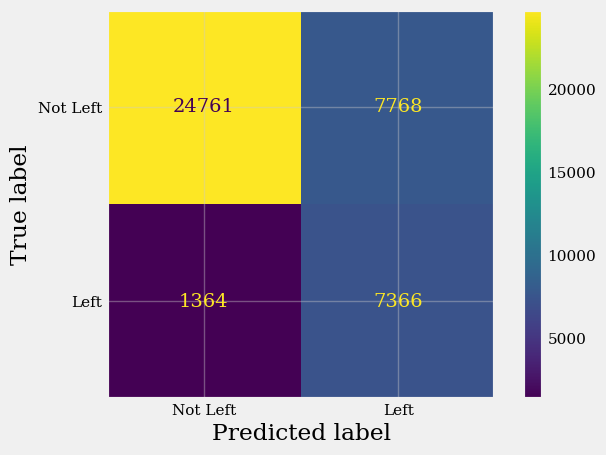

In [33]:
predictions_2 = clf_xgb_v2.predict(X_test)

cm = confusion_matrix(y_test, predictions_2, labels=clf_xgb_v2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Left', 'Left'])
disp.plot()
plt.show()

### Some Observations from above plot:

- Now if we look at our classified samples we can see that from total of **32529** people that **did not leave** the bank **24761 (76%)** were correctly classified and out of **8730** people that did leave the bank **7366 (84%)** were correctly classified.

- Although our accuracy for `Exited=0` is decreasing by some amount but the accracy for the `Exited=1` class is increasing by **29%** which is very huge and we can say that now our model is performing far greater that it was previously

# 5. Visualizations <a name="graph"></a>

## 5.1 XGBoost Tree
- We can use the followig code to see the tree which was built in the model. Code will only create the first tree for visualization. You may need to scroll horizontally or vertically to see the whole tree.
- You can also check the `bias` and `gain` for each variables.

weight:  {'CreditScore': 2.0, 'Balance': 5.0, 'Geography_France': 4.0, 'Geography_Spain': 1.0, 'Gender_Male': 6.0, 'IsActiveMember_0.0': 3.0, 'NumOfProducts_1': 1.0, 'NumOfProducts_3': 1.0}
gain:  {'CreditScore': 15.060656547546387, 'Balance': 1467.1622314453125, 'Geography_France': 788.6925659179688, 'Geography_Spain': 365.955810546875, 'Gender_Male': 584.2151489257812, 'IsActiveMember_0.0': 2819.006591796875, 'NumOfProducts_1': 30761.73828125, 'NumOfProducts_3': 15894.138671875}
cover:  {'CreditScore': 1967.990478515625, 'Balance': 8732.5322265625, 'Geography_France': 5593.0849609375, 'Geography_Spain': 4581.61669921875, 'Gender_Male': 8040.712890625, 'IsActiveMember_0.0': 16081.42578125, 'NumOfProducts_1': 50335.62109375, 'NumOfProducts_3': 19738.88671875}
total_gain:  {'CreditScore': 30.121313095092773, 'Balance': 7335.81103515625, 'Geography_France': 3154.770263671875, 'Geography_Spain': 365.955810546875, 'Gender_Male': 3505.291015625, 'IsActiveMember_0.0': 8457.01953125, 'NumOfPr

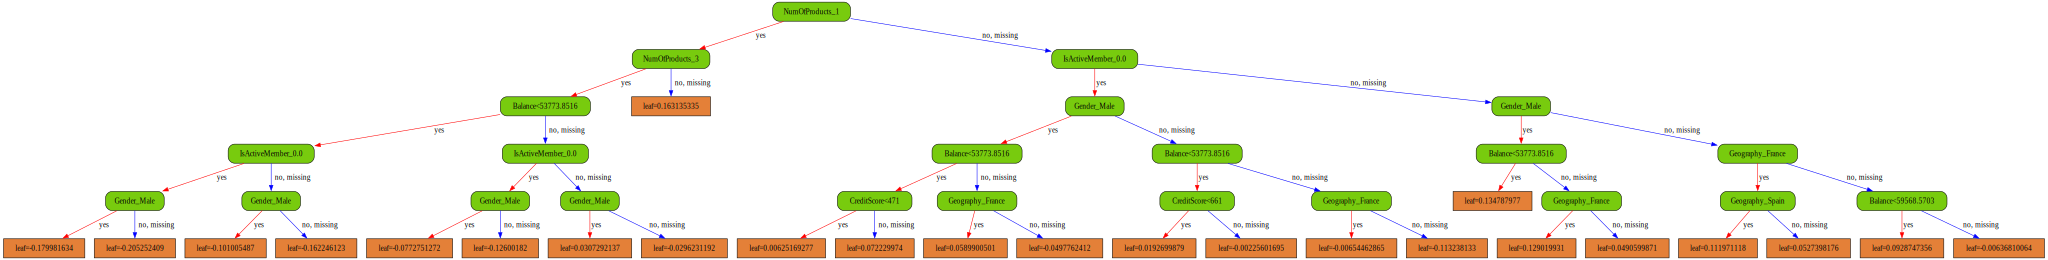

In [34]:
clf_xgb_v3 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=1.0,
                               learning_rate=0.1,
                               max_depth=5,
                               reg_lambda=10.0,
                               scale_pos_weight=5,
                               subsample=0.9,
                               colsample_bytree=0.5,
                               n_estimators=1)

clf_xgb_v3.fit(X_train, y_train)

bst = clf_xgb_v3.get_booster()

for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}

leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

xgb.to_graphviz(clf_xgb_v3, num_trees=0, size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

## 5.2 Feature Importance
Generally, feature importance provides a score that indicates **how useful or valuable each feature** was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

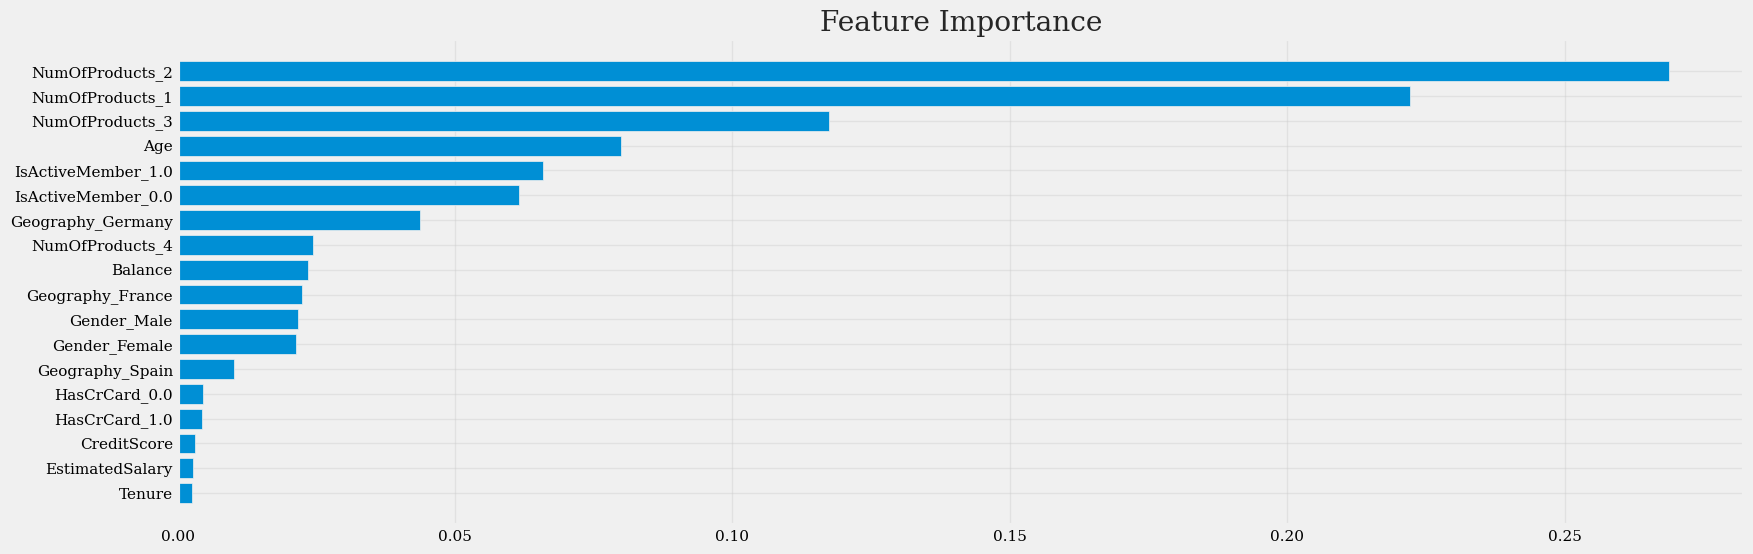

In [35]:
# Tree-based (or Gini) importance

feature_importance = clf_xgb_v2.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

## 5.3 Permutation Importance
The permutation feature importance is defined to be the **decrease in a model score** when a single feature value is randomly shuffled

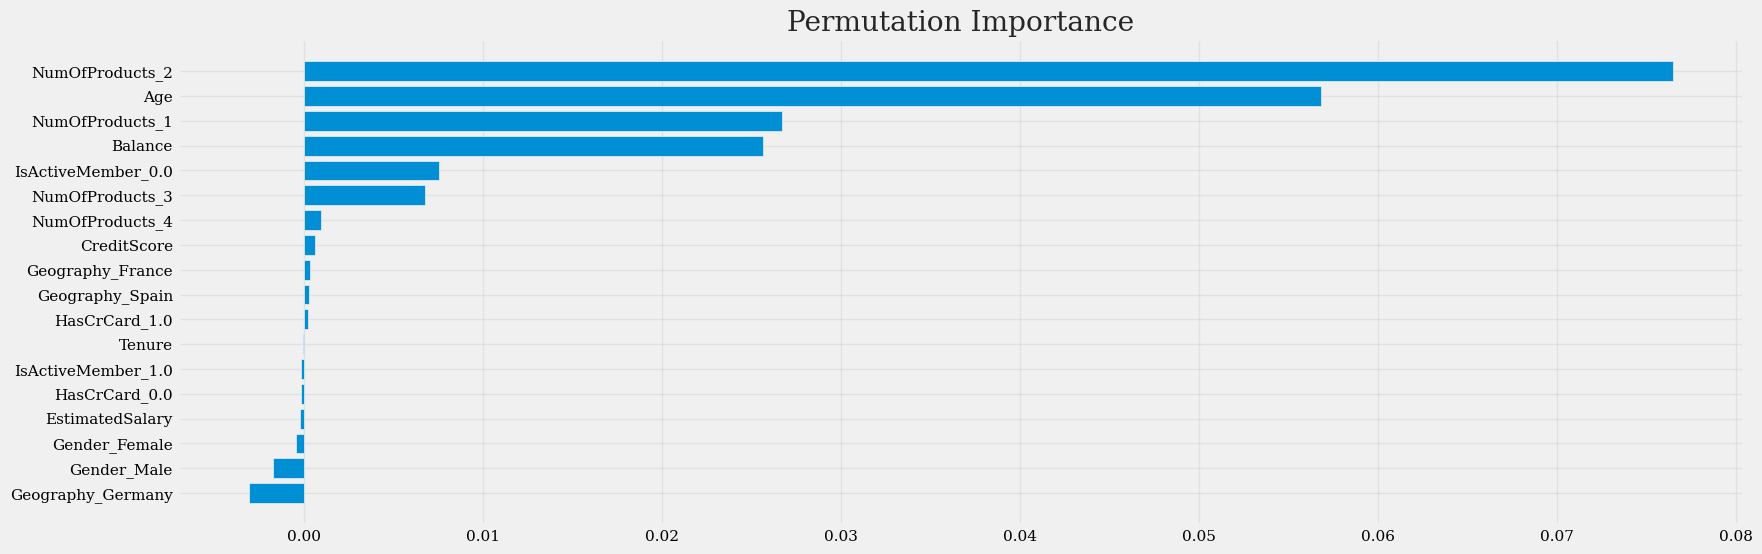

In [36]:
perm_importance = permutation_importance(clf_xgb_v2, np.ascontiguousarray(X_test), y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')
plt.show()

## 5.4 SHAP Importance
SHAP importance offers important insight about the predictions created in experiments. It can help you understand which features are the most important to the prediction. SHAP importance is measured at row level.

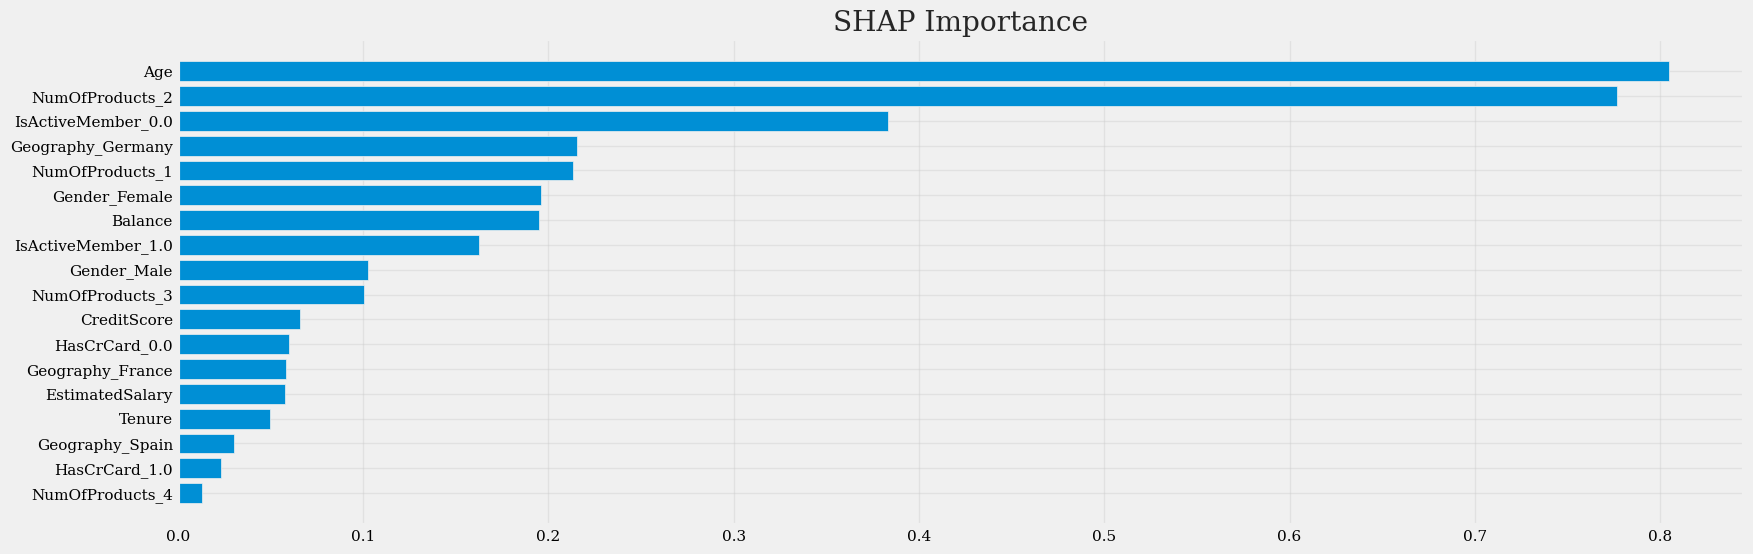

In [37]:
explainer = shap.Explainer(clf_xgb_v2)
shap_values = explainer(np.ascontiguousarray(X_test))
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')
plt.show()

# 6. Submission <a name="submission"></a>

In [38]:
# sample_submission.head()
sample_submission = sample_submission.drop(['Exited'], axis=1)
sample_submission.head()

,id
0,165034
1,165035
2,165036
3,165037
4,165038


In [39]:
submission = clf_xgb_v2.predict_proba(X_test_encoded)[:, 1]
submission

array([0.14192507, 0.95058805, 0.12358732, ..., 0.08518421, 0.4836004 ,
       0.49611276], dtype=float32)

In [40]:
sample_submission['Exited'] = submission
sample_submission.head()

,id,Exited
0,165034,0.141925
1,165035,0.950588
2,165036,0.123587
3,165037,0.607344
4,165038,0.736088


In [41]:
# sample_submission.to_csv(r"/kaggle/working/submission.csv", index=False)

<div style="border-radius:10px;border:#112241 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <b>Note:</b> Other models and parameters can also give the better result. This is not the best model but still we are getting pretty good results with it. If find this notebook helpful please consider upvoting and check out my other works too❤️. If you have any suggestions let me know in the comments 🙂  </div>
    
- Author - Akhil
- Date - 2/1/2023